In [15]:
import numpy as np
import pandas as pd

df_point7_config = np.load(f'./E1 results/E1 for analysis/E1 results z parameter 20250111 1225 theta .7 no desc_div_config.pkl.npy',allow_pickle=True)
df_point5_config = np.load(f'./E1 results/E1 for analysis/E1 results z parameter 20250111 1525 theta .5 no desc_div_config.pkl.npy',allow_pickle=True)

df_point5 = pd.read_pickle(f'./E1 results/E1 for analysis/E1.1.1 results z parameter theta .5.pkl')
df_point7 = pd.read_pickle(f'./E1 results/E1 for analysis/E1.1.2 results z parameter theta .7.pkl')

In [16]:
print(df_point7_config)
print(" ")
print(df_point5_config)

{'max_time_limit_minutes': 5, 'save_title': 'E1 results z parameter 20250111 1225 theta .5 no desc_div', 'd': 3, 'q': 20, 'bins': 5, 'min_cov': 0.05, 'min_coverage_abs': 3, 'correct_for_size': <function no_size_corr at 0x000001EF5A934B80>, 'comparison_type': 'complement', 'number_of_row_pairs': 100, 'similarity_threshold': 0.7, 'dataset_selection': 'feasible'}
 
{'max_time_limit_minutes': 5, 'save_title': 'E1 results z parameter 20250111 1525 theta .5 no desc_div', 'd': 3, 'q': 20, 'bins': 5, 'min_cov': 0.05, 'min_coverage_abs': 3, 'correct_for_size': <function no_size_corr at 0x000001EF5A934B80>, 'comparison_type': 'complement', 'number_of_row_pairs': 100, 'similarity_threshold': 0.5, 'dataset_selection': 'feasible'}


In [14]:
df_point5

,dataset_name,z,max_quality,avg_quality,max_coverage,avg_coverage,duration,count_quality,time_per_group,redundancy,diversity
0,wisconsin,2,0.865,0.850509,0.108,0.065464,7.684881,870,0.009,0.750000,4.278607
1,wisconsin,3,0.856,0.846980,0.108,0.064175,1.674861,339,0.005,0.750000,4.239572
2,wisconsin,4,0.856,0.822749,0.201,0.117526,1.106489,167,0.007,0.800000,3.335898
3,wisconsin,5,0.819,0.797354,0.201,0.118814,1.317301,114,0.012,0.700000,4.769419
4,wisconsin,6,0.815,0.786767,0.201,0.118041,2.405181,81,0.030,0.750000,3.96024
...,...,...,...,...,...,...,...,...,...,...,...
121,sushi,4,0.950,0.934061,0.690,0.310190,10.899621,68,0.160,0.700000,5.618804
122,sushi,5,0.950,0.928014,0.690,0.402760,9.523823,40,0.238,0.650000,6.490113
123,sushi,6,0.950,0.927152,0.690,0.412400,13.648139,31,0.440,0.750000,4.638065
124,sushi,7,0.950,0.925010,0.690,0.412230,40.030243,27,1.483,0.700000,5.553693


In [18]:
df_point7

,dataset_name,z,max_quality,avg_quality,max_coverage,avg_coverage,duration,count_quality,time_per_group,redundancy,diversity
0,wisconsin,2,0.865,0.850509,0.108,0.065464,7.709280,870,0.009,0.65,5.980409
1,wisconsin,3,0.856,0.846980,0.108,0.064175,2.078072,339,0.006,0.65,5.941373
2,wisconsin,4,0.856,0.822749,0.201,0.117526,1.628016,167,0.010,0.70,4.952777
3,wisconsin,5,0.819,0.797354,0.201,0.118814,1.343017,114,0.012,0.60,6.360711
4,wisconsin,6,0.815,0.786767,0.201,0.118041,2.227456,81,0.027,0.65,5.505075
...,...,...,...,...,...,...,...,...,...,...,...
121,sushi,4,0.950,0.934061,0.690,0.310190,10.345605,68,0.152,0.50,9.36549
122,sushi,5,0.950,0.928014,0.690,0.402760,9.180955,40,0.230,0.45,10.214827
123,sushi,6,0.950,0.927152,0.690,0.412400,13.160520,31,0.425,0.55,8.357825
124,sushi,7,0.950,0.925010,0.690,0.412230,39.347804,27,1.457,0.50,9.256546


In [10]:
list(df_point5['dataset_name'].unique())

['wisconsin',
 'cpu',
 'voting',
 'student_math',
 'student_por',
 'elevators',
 'ecoli',
 'wine',
 'Netherlands',
 'France',
 'Germany',
 'India',
 'Australia',
 'South Korea',
 'Indonesia',
 'Brazil',
 'large_economies',
 'sushi']

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import numpy as np

def plot_metric_vs_z(df, metric, path='', output_filename_start='metric_vs_z.svg', 
                   log_scale=False, normalize=True):
    """
    Plots values of a specified metric for each dataset in the DataFrame
    against the 'z' values. Optionally normalizes the metric and applies a 
    logarithmic scale to the y-axis. Uses only two line widths. For the last
    six datasets, a marker is always added at the last valid point. If the line 
    ends prematurely due to a NaN or zero, a cross marker is used; otherwise, 
    a round marker is used. The legend reflects each dataset's line style, 
    width, color, and marker for the last six datasets.

    Additionally, as a preprocessing step, all occurrences of np.float64(0.0) 
    in the metric column are converted to np.NaN.
    """
    
    output_filename = path+metric+' '+output_filename_start
    
    # Validate required columns
    required_columns = ['z', 'dataset_name', metric]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"DataFrame must contain the columns: {', '.join(missing_columns)}")
    
    # Preprocess: Convert all np.float64(0.0) in the metric column to np.NaN
    df[metric] = df[metric].apply(lambda x: np.nan if x == tuple([None,None]) else x)
    df[metric] = df[metric].apply(lambda x: np.nan if x == np.float64(0.0) else x)
    
    
    
    # Identify unique datasets and the last six datasets for special markers
    unique_datasets = list(df['dataset_name'].unique())
    marker_datasets = set(unique_datasets[-6:])
    
    # Dictionary to store marker styles for legend entries of last six datasets
    marker_map = {}
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define line styles and line widths for differentiation
    line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5)), (0, (1, 10))]
    line_widths = [1,1,1,1,1,1, 2,2,2,2,2,2, 1,1,1,1,1,1,]

    # Plot each dataset
    for i, dataset in enumerate(unique_datasets):
        color = 'black'
        style = line_styles[i % len(line_styles)]
        width = line_widths[i % len(line_widths)]
        
        dataset_df = df[df['dataset_name'] == dataset].copy()
        dataset_df.sort_values('z', inplace=True)

        if normalize:
            max_val = dataset_df[metric].max(skipna=True)
            dataset_df['plot_metric'] = (dataset_df[metric] / max_val 
                                         if max_val not in (0, np.nan) 
                                         else dataset_df[metric])
        else:
            dataset_df['plot_metric'] = dataset_df[metric]
        
        ax.plot(
            dataset_df['z'],
            dataset_df['plot_metric'],
            color=color,
            linestyle=style,
            linewidth=width,
            label=dataset
        )
        
        # Always try to add a marker for last six datasets
        if dataset in marker_datasets:
            # Exclude rows where 'plot_metric' is NaN or 0 to find the last valid point
            valid_df = dataset_df[(dataset_df['plot_metric'].notna()) & (dataset_df['plot_metric'] != 0)]
            if not valid_df.empty:
                max_z_valid = valid_df['z'].max()
                last_valid = valid_df[valid_df['z'] == max_z_valid]
                last_z = last_valid['z'].iloc[-1]
                last_val = last_valid['plot_metric'].iloc[-1]
                
                # Determine marker style:
                # If the last valid z is not the maximum z of the entire dataset,
                # then the line didn't reach the final point because of a NaN or 0.
                max_z_overall = dataset_df['z'].max()
                marker_style = 'x' if max_z_valid < max_z_overall else 'o'
                
                marker_map[dataset] = marker_style
                
                ax.plot(
                    last_z, last_val,
                    marker=marker_style,
                    markerfacecolor='none',
                    markeredgecolor=color,
                    markersize=8
                )
    
    ylabel = f"Normalized {metric}" if normalize else metric
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(f"{ylabel} vs. z for Each Dataset", fontsize=14)
    
    if log_scale:
        ax.set_yscale('log')
    
    legend_handles = []
    for i, dataset in enumerate(unique_datasets):
        color = 'black'
        style = line_styles[i % len(line_styles)]
        width = line_widths[i % len(line_widths)]
        
        if dataset in marker_datasets and dataset in marker_map:
            marker_style = marker_map[dataset]
            handle = Line2D(
                [0], [0],
                color=color,
                lw=width,
                linestyle=style,
                marker=marker_style,
                markerfacecolor='none',
                markeredgecolor=color,
                markersize=8
            )
        else:
            handle = Line2D([0], [0], color=color, lw=width, linestyle=style)
        
        legend_handles.append(handle)
    
    ax.legend(handles=legend_handles, labels=unique_datasets, fontsize='small',
              loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig(output_filename, format='svg', bbox_inches='tight')
    plt.show()


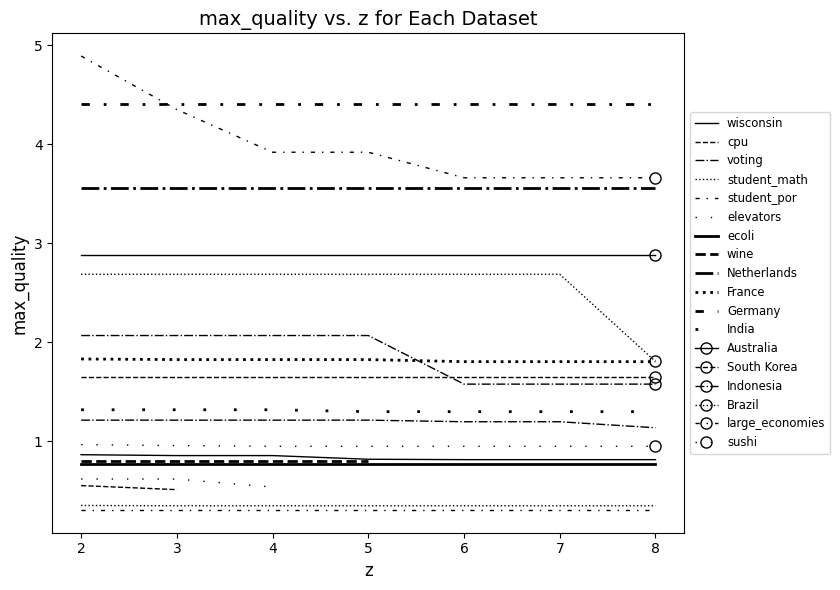

In [126]:
# plot_normalized_metric_vs_z(df_point5, 'max_quality', output_filename='metric_vs_z.svg')
plot_metric_vs_z(df_point5, 'max_quality', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=False)

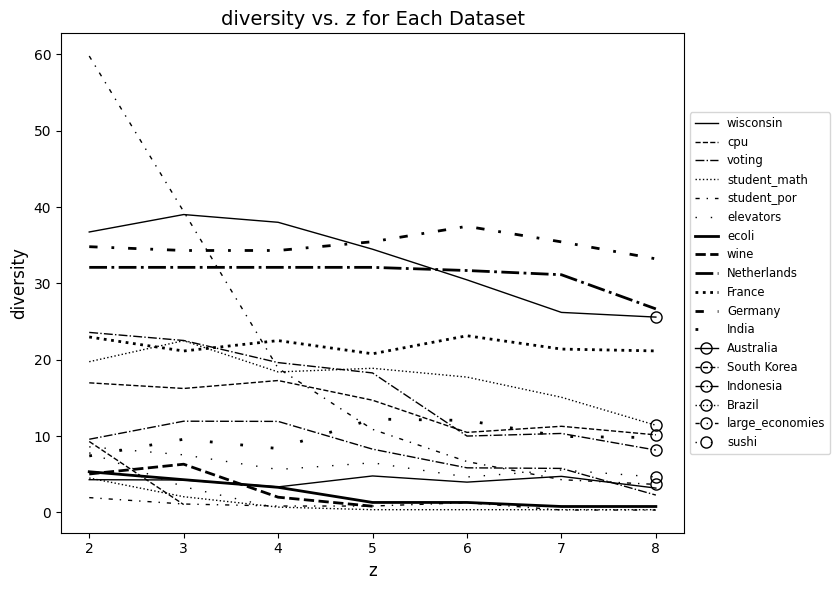

In [121]:
plot_metric_vs_z(df_point5, 'diversity', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=False)

In [117]:
df_point5['diversity'][9]==tuple([None,None])

True

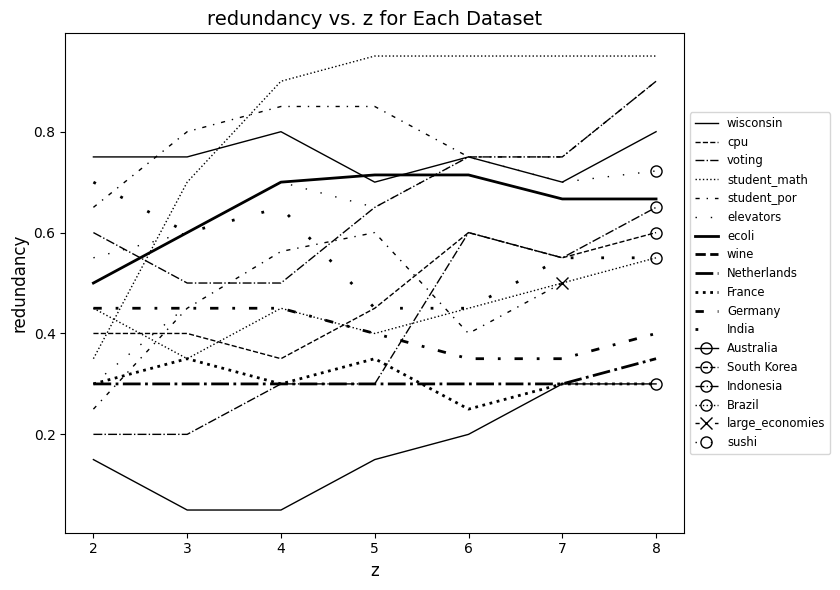

In [123]:
plot_metric_vs_z(df_point5, 'redundancy', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=False)

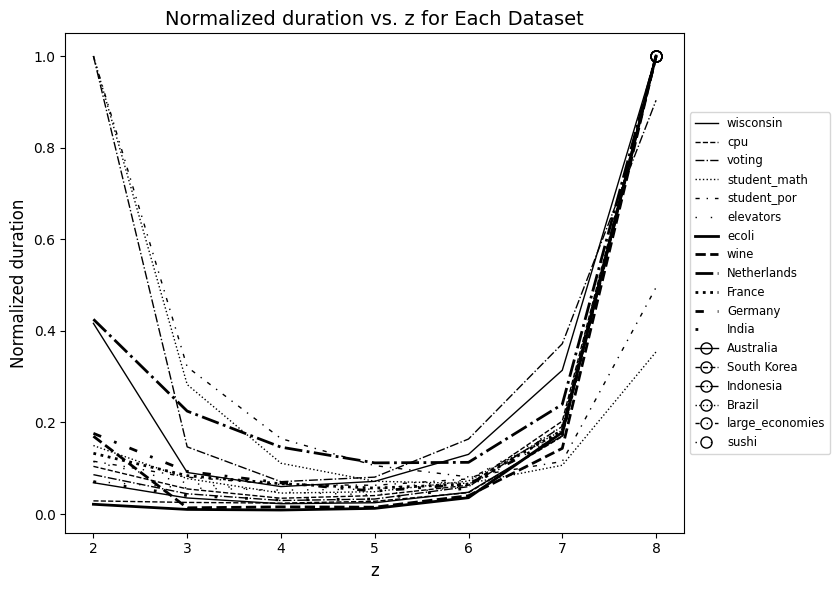

In [125]:
plot_metric_vs_z(df_point5, 'duration', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=True)

In [127]:
df_point5

,dataset_name,z,max_quality,avg_quality,max_coverage,avg_coverage,duration,count_quality,time_per_group,redundancy,diversity
0,wisconsin,2,0.865,0.850509,0.108,0.065464,7.684881,870,0.009,0.750000,4.278607
1,wisconsin,3,0.856,0.846980,0.108,0.064175,1.674861,339,0.005,0.750000,4.239572
2,wisconsin,4,0.856,0.822749,0.201,0.117526,1.106489,167,0.007,0.800000,3.335898
3,wisconsin,5,0.819,0.797354,0.201,0.118814,1.317301,114,0.012,0.700000,4.769419
4,wisconsin,6,0.815,0.786767,0.201,0.118041,2.405181,81,0.030,0.750000,3.960240
...,...,...,...,...,...,...,...,...,...,...,...
121,sushi,4,0.950,0.934061,0.690,0.310190,10.899621,68,0.160,0.700000,5.618804
122,sushi,5,0.950,0.928014,0.690,0.402760,9.523823,40,0.238,0.650000,6.490113
123,sushi,6,0.950,0.927152,0.690,0.412400,13.648139,31,0.440,0.750000,4.638065
124,sushi,7,0.950,0.925010,0.690,0.412230,40.030243,27,1.483,0.700000,5.553693


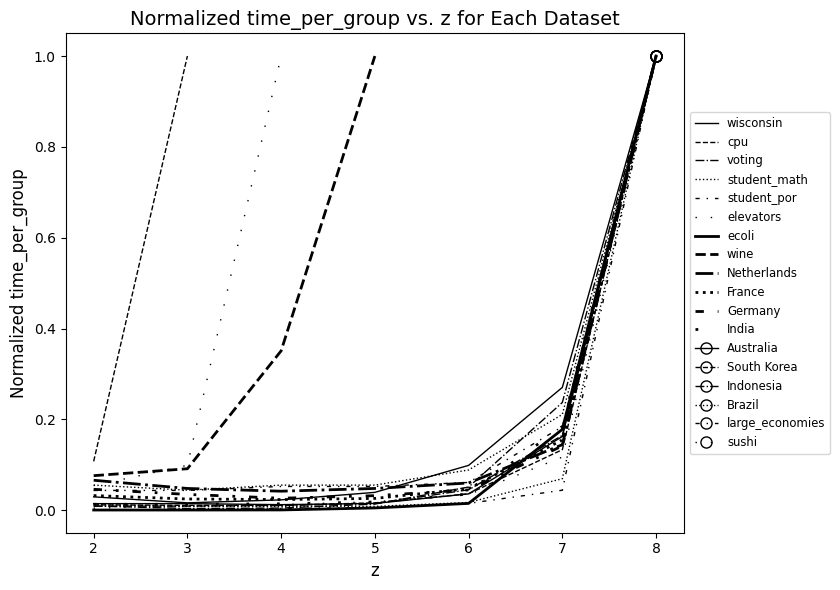

In [128]:
plot_metric_vs_z(df_point5, 'time_per_group', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=True)

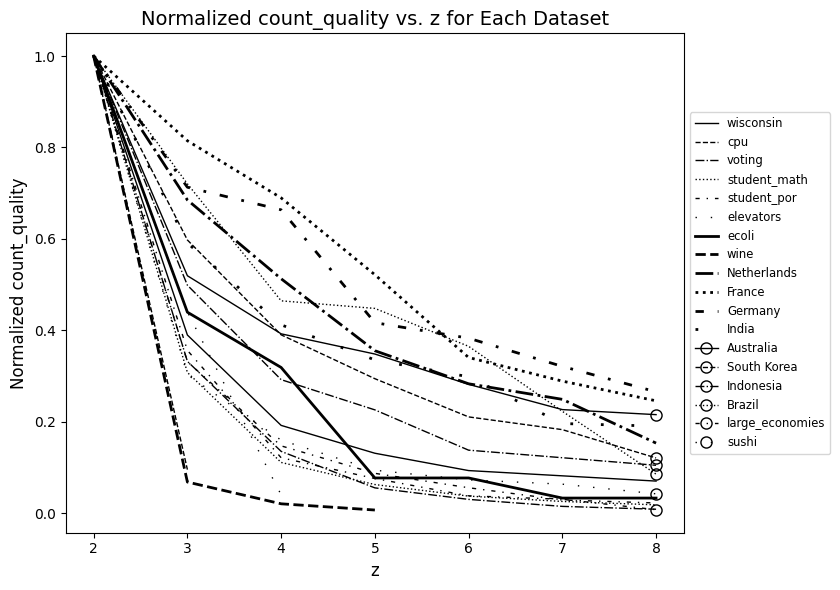

In [129]:
plot_metric_vs_z(df_point5, 'count_quality', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=True)

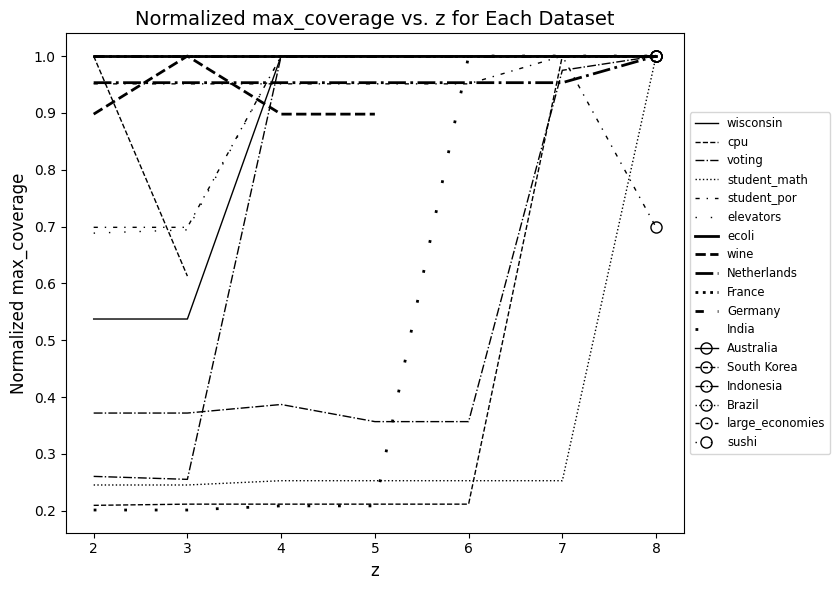

In [130]:
plot_metric_vs_z(df_point5, 'max_coverage', path='./E1 results/E1 for analysis/', output_filename_start='_vs_z.svg', log_scale=False, normalize=True)

In [132]:
import os

folder_path = f'./E1 results/E1 for analysis/figures_z/'  # Replace with your folder path
# file_names = os.listdir(folder_path)
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for i in file_names:
    print(r"\begin{figure}[htbp]")
    print(r"    \centering")
    print(r"    \includesvg[width=0.5\textwidth]{")
    print(rf"figures/{i}")
    print("}")
    print(r"    \caption{large\_economies.}")
    print(r"    \label{fig:time_redundancy}")
    print(r"\end{figure}")
    print(" ")


\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
figures/count_quality _vs_z.svg
}
    \caption{large\_economies.}
    \label{fig:time_redundancy}
\end{figure}
 
\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
figures/diversity _vs_z.svg
}
    \caption{large\_economies.}
    \label{fig:time_redundancy}
\end{figure}
 
\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
figures/duration _vs_z.svg
}
    \caption{large\_economies.}
    \label{fig:time_redundancy}
\end{figure}
 
\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
figures/max_coverage _vs_z.svg
}
    \caption{large\_economies.}
    \label{fig:time_redundancy}
\end{figure}
 
\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
figures/max_quality _vs_z.svg
}
    \caption{large\_economies.}
    \label{fig:time_redundancy}
\end{figure}
 
\begin{figure}[htbp]
    \centering
    \includesvg[width=0.5\textwidth]{
fig

['count_quality _vs_z.svg', 'diversity _vs_z.svg', 'duration _vs_z.svg', 'max_coverage _vs_z.svg', 'max_quality _vs_z.svg', 'redundancy _vs_z.svg', 'time_per_group _vs_z.svg']
